In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df=pd.read_csv("/content/sample_data/creditcard (2).csv")

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.shape

(284807, 31)

In [ ]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

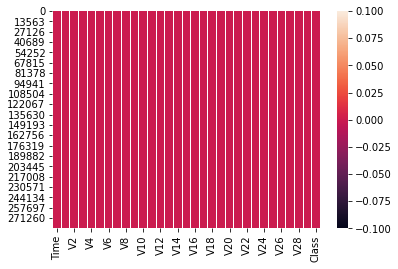

In [ ]:
#visualize null value
sns.heatmap(df.isnull())

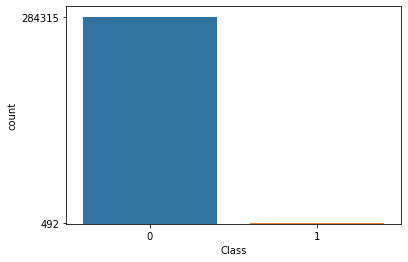

In [ ]:
#visualize traget to find how to balance data
sns.countplot(data=df,x="Class")
c=df["Class"].value_counts()
plt.yticks(c)
plt.show()

In [ ]:
def create_model(model):
  model.fit(X_train,Y_train)
  Y_pred=model.predict(X_test)
  print(classification_report(Y_pred,Y_test))
  print(confusion_matrix(Y_pred,Y_test))
  return model

In [ ]:
X=df.drop("Class",axis=1)
Y=df["Class"]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [ ]:
lr=LogisticRegression()

In [ ]:
lr=create_model(lr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85321
           1       0.63      0.70      0.66       122

    accuracy                           1.00     85443
   macro avg       0.81      0.85      0.83     85443
weighted avg       1.00      1.00      1.00     85443

[[85271    50]
 [   37    85]]


In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import  RandomOverSampler

In [ ]:
ros=RandomUnderSampler()

In [ ]:
X_sample1,Y_sample1=ros.fit_resample(X_train,Y_train)

In [ ]:
X_test_sample1,Y_test_sample1=ros.fit_resample(X_test,Y_test)

In [ ]:
pd.Series(Y_train).value_counts()

0    199007
1       357
Name: Class, dtype: int64

In [ ]:
pd.Series(Y_sample1).value_counts()

1    357
0    357
dtype: int64

In [ ]:
pd.Series(Y_test).value_counts()

0    85308
1      135
Name: Class, dtype: int64

In [ ]:
pd.Series(Y_test_sample1).value_counts()

1    135
0    135
dtype: int64

In [ ]:
def create_model1(model):
  model.fit(X_sample1,Y_sample1)
  Y_pred=model.predict(X_test_sample1)
  print(classification_report(Y_pred,Y_test_sample1))
  print(confusion_matrix(Y_pred,Y_test_sample1))
  return model

In [ ]:
lr1=LogisticRegression()

In [ ]:
lr1=create_model1(lr1)

              precision    recall  f1-score   support

           0       0.96      0.87      0.91       149
           1       0.85      0.95      0.90       121

    accuracy                           0.90       270
   macro avg       0.90      0.91      0.90       270
weighted avg       0.91      0.90      0.90       270

[[129  20]
 [  6 115]]


In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt=DecisionTreeClassifier()

In [ ]:
dt=create_model1(dt)

              precision    recall  f1-score   support

           0       0.85      0.90      0.87       128
           1       0.90      0.86      0.88       142

    accuracy                           0.88       270
   macro avg       0.88      0.88      0.88       270
weighted avg       0.88      0.88      0.88       270

[[115  13]
 [ 20 122]]


In [ ]:
dt1=DecisionTreeClassifier(max_depth=6)

In [ ]:
dt1=create_model1(dt1)

              precision    recall  f1-score   support

           0       0.95      0.90      0.92       143
           1       0.89      0.94      0.92       127

    accuracy                           0.92       270
   macro avg       0.92      0.92      0.92       270
weighted avg       0.92      0.92      0.92       270

[[128  15]
 [  7 120]]


In [ ]:
dt2=DecisionTreeClassifier(min_samples_leaf=50)

In [ ]:
dt2=create_model1(dt2)

              precision    recall  f1-score   support

           0       1.00      0.84      0.91       161
           1       0.81      1.00      0.89       109

    accuracy                           0.90       270
   macro avg       0.90      0.92      0.90       270
weighted avg       0.92      0.90      0.90       270

[[135  26]
 [  0 109]]


In [ ]:
dt3=DecisionTreeClassifier(criterion='entropy',min_samples_leaf=50)

In [ ]:
dt3=DecisionTreeClassifier(criterion='entropy',min_samples_leaf=50)

              precision    recall  f1-score   support

           0       1.00      0.83      0.91       162
           1       0.80      1.00      0.89       108

    accuracy                           0.90       270
   macro avg       0.90      0.92      0.90       270
weighted avg       0.92      0.90      0.90       270

[[135  27]
 [  0 108]]


In [ ]:
#boosting
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
ada=AdaBoostClassifier(n_estimators=50)

In [ ]:
ada=create_model1(ada)

              precision    recall  f1-score   support

           0       0.96      0.90      0.93       144
           1       0.90      0.96      0.93       126

    accuracy                           0.93       270
   macro avg       0.93      0.93      0.93       270
weighted avg       0.93      0.93      0.93       270

[[130  14]
 [  5 121]]


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gbc=GradientBoostingClassifier(n_estimators=50)

In [ ]:
gbc=create_model1(gbc)

              precision    recall  f1-score   support

           0       0.98      0.89      0.93       148
           1       0.88      0.98      0.93       122

    accuracy                           0.93       270
   macro avg       0.93      0.93      0.93       270
weighted avg       0.93      0.93      0.93       270

[[132  16]
 [  3 119]]


In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgb=XGBClassifier(n_estimators=50,reg_alpha=1)

In [ ]:
xgb=create_model1(xgb)

              precision    recall  f1-score   support

           0       0.99      0.89      0.94       149
           1       0.88      0.98      0.93       121

    accuracy                           0.93       270
   macro avg       0.93      0.94      0.93       270
weighted avg       0.94      0.93      0.93       270

[[133  16]
 [  2 119]]


In [ ]:
#1. Bagging : call class BaggingClassifier
from sklearn.ensemble import BaggingClassifier

In [ ]:
bc=BaggingClassifier(LogisticRegression(),n_estimators=10,max_samples=10,random_state=1)

In [ ]:
#call function
bc=create_model1(bc)

              precision    recall  f1-score   support

           0       1.00      0.81      0.89       167
           1       0.76      1.00      0.87       103

    accuracy                           0.88       270
   macro avg       0.88      0.90      0.88       270
weighted avg       0.91      0.88      0.88       270

[[135  32]
 [  0 103]]


In [ ]:
#Pasting 
#create object of BaggingClassifier inbuilt class
bc1=BaggingClassifier(LogisticRegression(),n_estimators=10,max_samples=10,random_state=1,
                      bootstrap=False) #by default bootstrap parameter=True means use Bagging

In [ ]:
#call function 
bc1=create_model1(bc1)

              precision    recall  f1-score   support

           0       1.00      0.83      0.91       162
           1       0.80      1.00      0.89       108

    accuracy                           0.90       270
   macro avg       0.90      0.92      0.90       270
weighted avg       0.92      0.90      0.90       270

[[135  27]
 [  0 108]]


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf=RandomForestClassifier(n_estimators=10,max_features =10,random_state=1)

In [ ]:
#call function
rf=create_model1(rf)

              precision    recall  f1-score   support

           0       0.99      0.88      0.93       152
           1       0.86      0.98      0.92       118

    accuracy                           0.92       270
   macro avg       0.92      0.93      0.92       270
weighted avg       0.93      0.92      0.92       270

[[133  19]
 [  2 116]]


In [ ]:
#supportVectorMachine
#linear kernal function
from sklearn.svm import LinearSVC

In [ ]:
#create object
svc=LinearSVC(random_state=1)

In [ ]:
svc=create_model1(svc)

              precision    recall  f1-score   support

           0       0.94      0.67      0.78       189
           1       0.54      0.90      0.68        81

    accuracy                           0.74       270
   macro avg       0.74      0.79      0.73       270
weighted avg       0.82      0.74      0.75       270

[[127  62]
 [  8  73]]


In [ ]:
#score not bad but try its better 
#Apply soft margin means add externally error on training time
#create the object of inbuilt class LinearSVC  and passing parameter C for error
#create object
svc1=LinearSVC(random_state=1,C=0.5)#always error add < 1 and c is inbuild parameter which pass value=0.5(0to1)

In [ ]:
svc1=create_model1(svc1)

              precision    recall  f1-score   support

           0       0.94      0.67      0.78       189
           1       0.54      0.90      0.68        81

    accuracy                           0.74       270
   macro avg       0.74      0.79      0.73       270
weighted avg       0.82      0.74      0.75       270

[[127  62]
 [  8  73]]


In [ ]:
#polynomial kernal function of 
from sklearn.svm import SVC

In [ ]:
poly_svc=SVC(random_state=1,kernel="poly")

In [ ]:
poly_svc=create_model1(poly_svc)

              precision    recall  f1-score   support

           0       0.35      0.56      0.43        84
           1       0.73      0.53      0.61       186

    accuracy                           0.54       270
   macro avg       0.54      0.54      0.52       270
weighted avg       0.61      0.54      0.55       270

[[47 37]
 [88 98]]


In [ ]:
#apply anova
 #anova test
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest


In [ ]:
anova=SelectKBest(score_func=f_regression,k=2)

In [ ]:
X_train_anova=anova.fit_transform(X_sample1,Y_sample1)

In [ ]:
X_test_anova=anova.transform(X_test_sample1)

In [ ]:
anova.get_support()

array([False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [ ]:
def create_model2(model):
  model.fit(X_train_anova,Y_sample1)
  Y_pred=model.predict(X_test_anova)
  print(classification_report(Y_pred,Y_test_sample1))
  print(confusion_matrix(Y_test_sample1,Y_pred))
  return model

In [ ]:
lr2=LogisticRegression()

In [ ]:
lr2=create_model2(lr2)


              precision    recall  f1-score   support

           0       0.95      0.90      0.92       143
           1       0.89      0.94      0.92       127

    accuracy                           0.92       270
   macro avg       0.92      0.92      0.92       270
weighted avg       0.92      0.92      0.92       270

[[128   7]
 [ 15 120]]


In [ ]:
#apply chi2-test
for col in X:
    print("Column Name : ",col)
    print(df[col].unique())

Column Name :  Time
[0.00000e+00 1.00000e+00 2.00000e+00 ... 1.72787e+05 1.72788e+05
 1.72792e+05]
Column Name :  V1
[-1.35980713  1.19185711 -1.35835406 ...  1.91956501 -0.24044005
 -0.53341252]
Column Name :  V2
[-0.07278117  0.26615071 -1.34016307 ... -0.30125385  0.53048251
 -0.18973334]
Column Name :  V3
[ 2.53634674  0.16648011  1.77320934 ... -3.24963981  0.70251023
  0.70333737]
Column Name :  V4
[ 1.37815522  0.44815408  0.37977959 ... -0.55782812  0.68979917
 -0.50627124]
Column Name :  V5
[-0.33832077  0.06001765 -0.50319813 ...  2.63051512 -0.37796113
 -0.01254568]
Column Name :  V6
[ 0.46238778 -0.08236081  1.80049938 ...  3.0312601   0.62370772
 -0.64961669]
Column Name :  V7
[ 0.23959855 -0.07880298  0.79146096 ... -0.29682653 -0.68617999
  1.57700625]
Column Name :  V8
[ 0.0986979   0.08510165  0.24767579 ...  0.70841718  0.67914546
 -0.41465041]
Column Name :  V9
[ 0.36378697 -0.25542513 -1.51465432 ...  0.43245405  0.39208671
  0.48617951]
Column Name :  V10
[ 0.09079

In [ ]:
#here doesnot apply chi-2 beacuse negative value in given dataset

In [ ]:
#here apply PCA
from sklearn.decomposition import PCA

In [ ]:
#Create object of PCA class
pc=PCA(n_components=None,random_state=1)  
#n_components  inbuilt parameters ,here  pass no. of components means PC here total input 13 features
#input features

In [ ]:
X_train_pc=pc.fit_transform(X_sample1) #for training
X_test_pc=pc.transform(X_test_sample1) #for testing

In [ ]:
explain_variance=pc.explained_variance_ratio_
print(explain_variance) #automatic arrange variance in descending order

[9.99979143e-01 2.07199238e-05 9.04111232e-08 1.46407153e-08
 1.12333736e-08 4.90741274e-09 4.72790146e-09 3.24257850e-09
 9.94551660e-10 9.47813698e-10 7.58268711e-10 6.55601556e-10
 5.93802244e-10 4.79040141e-10 4.55022743e-10 4.25640888e-10
 4.14730973e-10 3.56499237e-10 3.36067757e-10 3.25697542e-10
 2.42104504e-10 2.29331768e-10 2.13787685e-10 1.76493755e-10
 1.50488889e-10 1.28144527e-10 1.03505248e-10 8.01672636e-11
 7.38118579e-11 3.75397259e-11]


In [ ]:
#Create object of PCA class
pc1=PCA(n_components=15,random_state=1)  
#n_components  inbuilt parameters ,here  pass no. of components =2 means PC here total input 13 features
#input features

In [ ]:
X_train_pc1=pc1.fit_transform(X_sample1) #for training
X_test_pc1=pc1.transform(X_test_sample1) #for testing

In [ ]:
explain_variance=pc1.explained_variance_ratio_
print(explain_variance) #automatic arrange variancexplain_variance=pc1.explained_variance_ratio_
print(explain_variance) #automatic arrange variance in descending ordere in descending order

[9.99979143e-01 2.07199238e-05 9.04111232e-08 1.46407153e-08
 1.12333736e-08 4.90741274e-09 4.72790146e-09 3.24257850e-09
 9.94551637e-10 9.47813656e-10 7.58268606e-10 6.55601539e-10
 5.93780549e-10 4.79028519e-10 4.55014919e-10]
[9.99979143e-01 2.07199238e-05 9.04111232e-08 1.46407153e-08
 1.12333736e-08 4.90741274e-09 4.72790146e-09 3.24257850e-09
 9.94551637e-10 9.47813656e-10 7.58268606e-10 6.55601539e-10
 5.93780549e-10 4.79028519e-10 4.55014919e-10]


In [ ]:
#BaseLine Model Logistic regression because we have  classification type dataset
#classification algorithm 
#use logistic regression algorithm
#create object
lr3=LogisticRegression()

In [ ]:
#Train the model then inbuilt function fit() of LogisticRegression class
lr.fit(X_train_pc1,Y_sample1)   #same as linearregression


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
#test the model
Y_pred=lr.predict(X_test_pc1)

In [ ]:
print(classification_report(Y_test_sample1,Y_pred))

print("Confusion Matrix : ")
#Confusion matrix
print(confusion_matrix(Y_test_sample1,Y_pred))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91       135
           1       0.98      0.81      0.89       135

    accuracy                           0.90       270
   macro avg       0.91      0.90      0.90       270
weighted avg       0.91      0.90      0.90       270

Confusion Matrix : 
[[133   2]
 [ 25 110]]


In [ ]:
#here best score is 98%.using Extreme gradient boosting ensembling technique. Extreme Gradient Boosting(XGB) : - this is a gradient boost but this is better version of gradient
#boost. XGB is similar work as GB. 
